#**Ex. No.5 - Create Line Plots, Scatter Plots, and Histograms Using Matplotlib to Visualize Patient Health Metrics**
---
Niranjana A

220301061

III BME - "A"


---



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

**Using matplotlib**

In [ ]:
#https://github.com/WenjieDu/TSDB
!pip install tsdb
import tsdb

# list all available datasets in TSDB
tsdb.list()
# ['physionet_2012',
#  'physionet_2019',
#  'electricity_load_diagrams',
#  'beijing_multisite_air_quality',
#  'italy_air_quality',
#  'vessel_ais',
#  'electricity_transformer_temperature',
#  'pems_traffic',
#  'solar_alabama',
#  'ucr_uea_ACSF1',
#  'ucr_uea_Adiac',
#  ...

# select the dataset you need and load it, TSDB will download, extract, and process it automatically
#data = tsdb.load('physionet_2012')
# if you need the raw data, use download_and_extract()
tsdb.download_and_extract('physionet_2012', './save_it_here')
# datasets you once loaded are cached, and you can check them with list_cached_data()
tsdb.list_cache()
# you can delete only one specific dataset's pickled cache
#tsdb.delete_cache(dataset_name='physionet_2012', only_pickle=True)
# you can delete only one specific dataset raw files and preserve others
#tsdb.delete_cache(dataset_name='physionet_2012')
# or you can delete all cache with delete_cached_data() to free disk space
#tsdb.delete_cache()

# The default cache directory is ~/.pypots/tsdb under the user's home directory.
# To avoid taking up too much space if downloading many datasets ,
# TSDB cache directory can be migrated to an external disk
#tsdb.migrate_cache("/mnt/external_disk/TSDB_cache")

2024-09-10 05:02:22 [INFO]: Start downloading...
2024-09-10 05:02:34 [INFO]: Successfully downloaded data to /tmp/tmpmo7exwz8/set-a.tar.gz
2024-09-10 05:02:36 [INFO]: Successfully extracted data to ./save_it_here
2024-09-10 05:02:47 [INFO]: Successfully downloaded data to /tmp/tmpgka0ya0h/set-b.tar.gz
2024-09-10 05:02:49 [INFO]: Successfully extracted data to ./save_it_here
2024-09-10 05:03:01 [INFO]: Successfully downloaded data to /tmp/tmpxz4b_u9_/set-c.tar.gz
2024-09-10 05:03:02 [INFO]: Successfully extracted data to ./save_it_here
2024-09-10 05:03:03 [INFO]: Successfully downloaded data to ./save_it_here/Outcomes-a.txt
2024-09-10 05:03:05 [INFO]: Successfully downloaded data to ./save_it_here/Outcomes-b.txt
2024-09-10 05:03:06 [INFO]: Successfully downloaded data to ./save_it_here/Outcomes-c.txt


[]

2024-09-10 05:03:09 [INFO]: Start downloading...


FileExistsError: [Errno 17] File exists: './save_it_here'

In [ ]:
df = pd.read_csv('./save_it_here/set-a/132539.csv')

In [ ]:
df.head()

,Time,Parameter,Value
0,00:00,RecordID,132539.0
1,00:00,Age,54.0
2,00:00,Gender,0.0
3,00:00,Height,-1.0
4,00:00,ICUType,4.0


In [ ]:
# Group by 'Parameter' and aggregate 'Value' as a list
df_grouped = df.groupby('Parameter')['Value'].apply(list).reset_index(name='Values')

# Create a dictionary to map 'Time' to 'Values' for each 'Parameter'
data = {}
for index, row in df_grouped.iterrows():
    parameter = row['Parameter']
    values = row['Values']
    times = df[df['Parameter'] == parameter]['Time'].tolist()
    data[parameter] = dict(zip(times, values))

# Create a DataFrame from the dictionary
df_pivot = pd.DataFrame(data).transpose()
df_pivot

,00:00,10:37,33:07,00:07,03:37,07:37,11:37,15:37,19:37,23:37,...,26:37,38:37,44:37,46:37,24:37,28:37,30:37,32:37,34:37,36:37
Age,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUN,NaN,13.00,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Creatinine,NaN,0.80,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCS,NaN,NaN,NaN,15.00,15.00,15.00,15.00,15.0,15.00,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glucose,NaN,205.00,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCO3,NaN,26.00,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCT,NaN,33.50,30.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HR,NaN,61.00,NaN,73.00,80.00,64.00,58.00,69.0,60.00,71.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Dropping infrequent parameters
parameters_to_drop = ['Glucose','BUN','Creatinine','Age','RecordID', 'Height','ICUType','Weight','Mg','K','Temp','Urine','WBC','Platelets','Na','HCO3','HCT']
df_dropped = df_pivot.drop(parameters_to_drop)
df_dropped

,00:00,10:37,33:07,00:07,03:37,07:37,11:37,15:37,19:37,23:37,...,26:37,38:37,44:37,46:37,24:37,28:37,30:37,32:37,34:37,36:37
GCS,NaN,NaN,NaN,15.00,15.00,15.00,15.00,15.0,15.00,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HR,NaN,61.00,NaN,73.00,80.00,64.00,58.00,69.0,60.00,71.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIDiasABP,NaN,62.00,NaN,65.00,52.00,49.00,40.00,49.0,55.00,41.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIMAP,NaN,77.67,NaN,92.33,72.67,68.33,60.33,70.0,74.67,61.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NISysABP,NaN,109.00,NaN,147.00,114.00,107.00,101.00,112.0,114.00,103.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RespRate,NaN,15.00,NaN,19.00,20.00,15.00,15.00,12.0,13.00,24.00,...,19.0,21.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extract time values and convert to minutes
time_values = [(int(col.split(':')[0]) * 60 + int(col.split(':')[1])) for col in df_dropped.columns]

# Sort time values and get corresponding column order
sorted_columns = df_dropped.columns[sorted(range(len(time_values)), key=time_values.__getitem__)]

# Reorder columns in the DataFrame
df_reordered = df_dropped[sorted_columns]
df_reordered

,00:00,00:07,00:37,01:37,02:37,03:08,03:37,04:37,05:37,07:37,...,38:37,39:37,40:37,41:37,42:37,43:37,44:37,45:37,46:37,47:37
GCS,NaN,15.00,NaN,NaN,NaN,NaN,15.00,NaN,NaN,15.00,...,NaN,15.00,NaN,NaN,NaN,15.00,NaN,NaN,NaN,15.00
HR,NaN,73.00,77.0,60.0,62.00,NaN,80.00,74.0,73.00,64.00,...,NaN,73.00,77.0,73.00,NaN,73.00,NaN,84.00,NaN,86.00
NIDiasABP,NaN,65.00,58.0,62.0,52.00,NaN,52.00,NaN,45.00,49.00,...,NaN,57.00,53.0,50.00,67.00,64.00,NaN,56.00,NaN,55.00
NIMAP,NaN,92.33,91.0,87.0,75.67,NaN,72.67,NaN,66.67,68.33,...,NaN,78.67,72.0,69.67,87.67,82.67,NaN,81.33,NaN,79.33
NISysABP,NaN,147.00,157.0,137.0,123.00,NaN,114.00,NaN,110.00,107.00,...,NaN,122.00,110.0,109.00,129.00,120.00,NaN,132.00,NaN,128.00
RespRate,NaN,19.00,19.0,18.0,19.00,NaN,20.00,20.0,17.00,15.00,...,21.0,16.00,18.0,14.00,23.00,17.00,20.0,20.00,20.0,23.00


In [ ]:
df_reordered = df_reordered.dropna(axis=1)
df_reordered
from google.colab import drive
drive.mount('/content/drive')

df_reordered.to_csv('/content/drive/My Drive/Datasets/Continuous data/Health parameters.csv', index=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


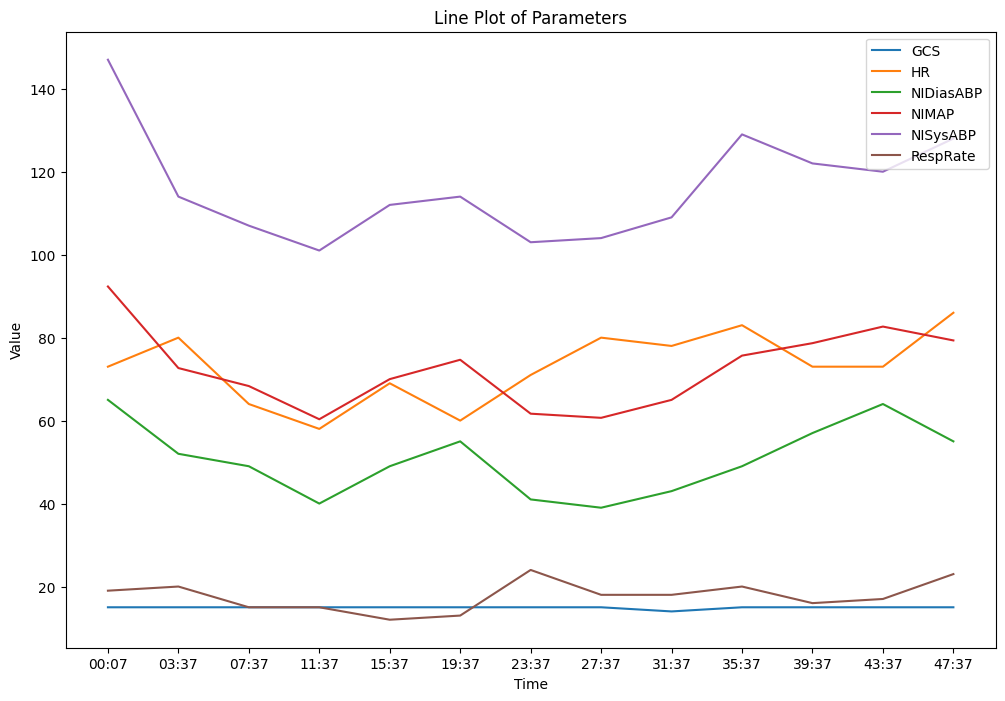

In [ ]:
plt.figure(figsize=(12, 8))
for parameter in df_reordered.index:
    plt.plot(df_reordered.columns, df_reordered.loc[parameter], label=parameter)
plt.title('Line Plot of Parameters')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

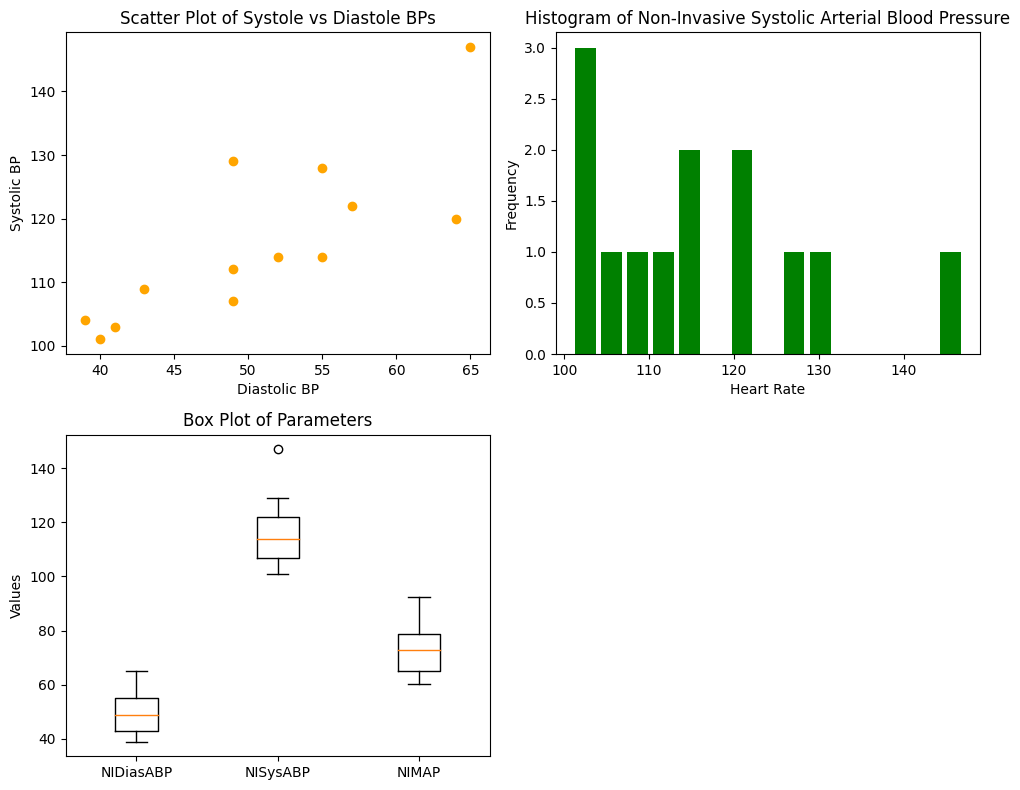

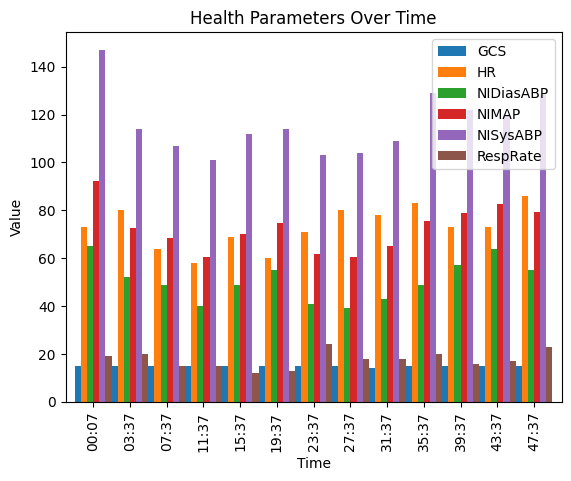

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
#SCATTER PLOT
plt.scatter(df_reordered.loc['NIDiasABP'], df_reordered.loc['NISysABP'], color='orange')
plt.title('Scatter Plot of Systole vs Diastole BPs')
plt.xlabel('Diastolic BP')
plt.ylabel('Systolic BP')
plt.subplot(2,2,2)
#HISTOGRAM
plt.hist(df_reordered.loc['NISysABP'], bins=15, rwidth=0.8, color='green')  # Adjust the number of bins as needed
plt.title('Histogram of Non-Invasive Systolic Arterial Blood Pressure')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.subplot(2,2,3)
#BOXPLOT
plt.boxplot([df_reordered.loc['NIDiasABP'], df_reordered.loc['NISysABP'], df_reordered.loc['NIMAP']])
plt.title('Box Plot of Parameters')
plt.xticks(range(1,4), ['NIDiasABP', 'NISysABP', 'NIMAP'])
plt.ylabel('Values')
plt.tight_layout()
#BAR PLOT
df_transposed = df_reordered.transpose()
df_transposed.plot(kind='bar', width=1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Health Parameters Over Time')
plt.legend(loc='upper right')

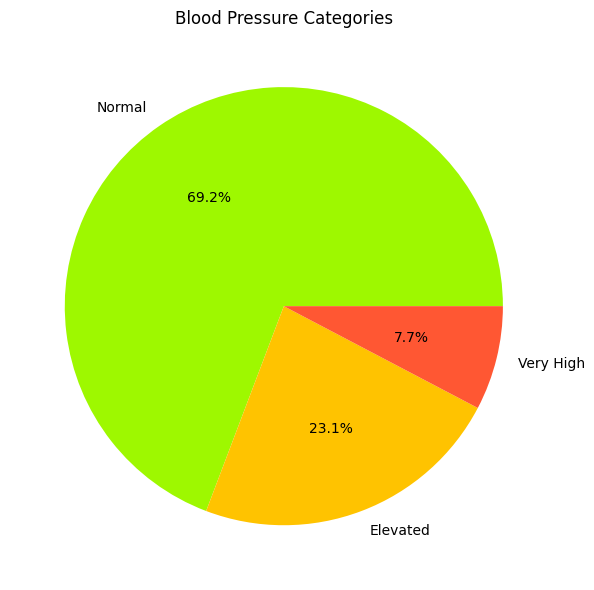

In [ ]:
#PIE CHART
bp_bins = [0, 120, 129, float('inf')] # Define bins and labels based on blood pressure categories
bp_labels = ['Normal', 'Elevated', 'Very High',]
bp_categories = pd.cut(df_reordered.loc['NISysABP'], bins=bp_bins, labels=bp_labels) # Bin the NISysABP data
category_counts = bp_categories.value_counts() # Count values in each category
plt.figure(figsize=(10,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['#9ef800', '#FFC300', '#FF5733'])
plt.title('Blood Pressure Categories')
plt.tight_layout()
plt.show()

**Using Seaborn**

In [ ]:
!pip install seaborn
import seaborn as sns

In [ ]:
df_reordered

,00:07,03:37,07:37,11:37,15:37,19:37,23:37,27:37,31:37,35:37,39:37,43:37,47:37
GCS,15.00,15.00,15.00,15.00,15.0,15.00,15.00,15.00,14.0,15.00,15.00,15.00,15.00
HR,73.00,80.00,64.00,58.00,69.0,60.00,71.00,80.00,78.0,83.00,73.00,73.00,86.00
NIDiasABP,65.00,52.00,49.00,40.00,49.0,55.00,41.00,39.00,43.0,49.00,57.00,64.00,55.00
NIMAP,92.33,72.67,68.33,60.33,70.0,74.67,61.67,60.67,65.0,75.67,78.67,82.67,79.33
NISysABP,147.00,114.00,107.00,101.00,112.0,114.00,103.00,104.00,109.0,129.00,122.00,120.00,128.00
RespRate,19.00,20.00,15.00,15.00,12.0,13.00,24.00,18.00,18.0,20.00,16.00,17.00,23.00


In [ ]:
df_reordered.transpose()

,GCS,HR,NIDiasABP,NIMAP,NISysABP,RespRate
00:07,15.0,73.0,65.0,92.33,147.0,19.0
03:37,15.0,80.0,52.0,72.67,114.0,20.0
07:37,15.0,64.0,49.0,68.33,107.0,15.0
11:37,15.0,58.0,40.0,60.33,101.0,15.0
15:37,15.0,69.0,49.0,70.00,112.0,12.0
19:37,15.0,60.0,55.0,74.67,114.0,13.0
23:37,15.0,71.0,41.0,61.67,103.0,24.0
27:37,15.0,80.0,39.0,60.67,104.0,18.0
31:37,14.0,78.0,43.0,65.00,109.0,18.0
35:37,15.0,83.0,49.0,75.67,129.0,20.0


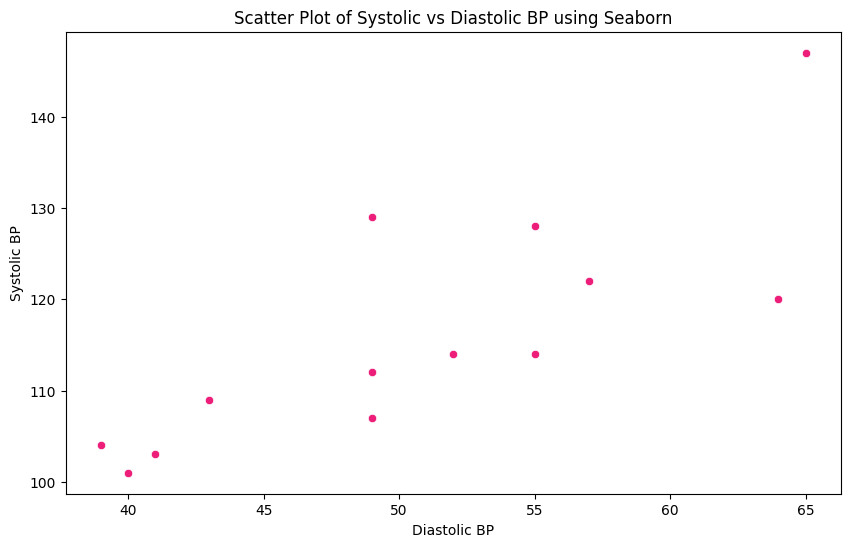

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NIDiasABP', y='NISysABP', data=df_reordered.transpose(), color='#ed1e79')
plt.title('Scatter Plot of Systolic vs Diastolic BP using Seaborn')
plt.xlabel('Diastolic BP')
plt.ylabel('Systolic BP')
plt.show()

<Axes: xlabel='NIDiasABP', ylabel='NISysABP'>

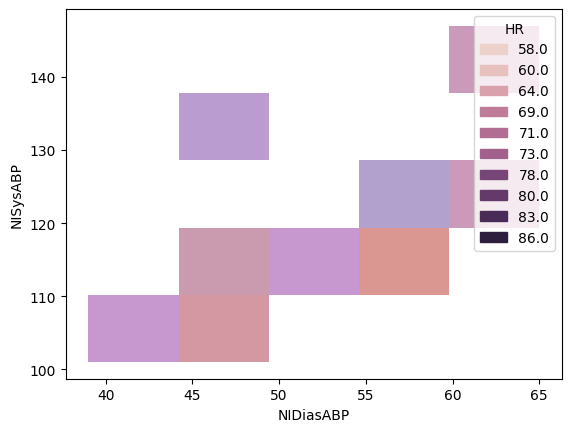

In [ ]:
sns.histplot(data=df_reordered.transpose(), x="NIDiasABP", y="NISysABP", hue = "HR", multiple="stack")

<Axes: ylabel='Density'>

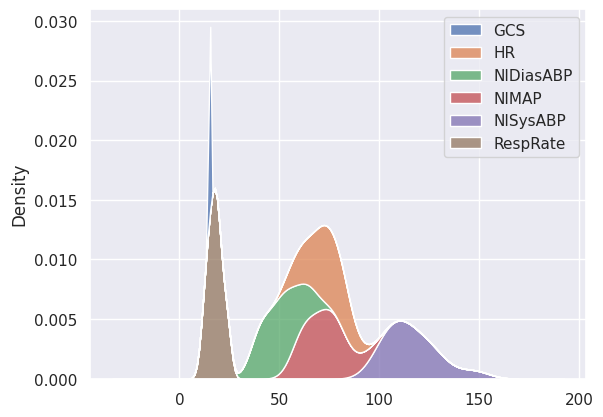

In [ ]:
sns.set_theme()
sns.kdeplot(df_reordered.transpose(), multiple="stack")

<Axes: >

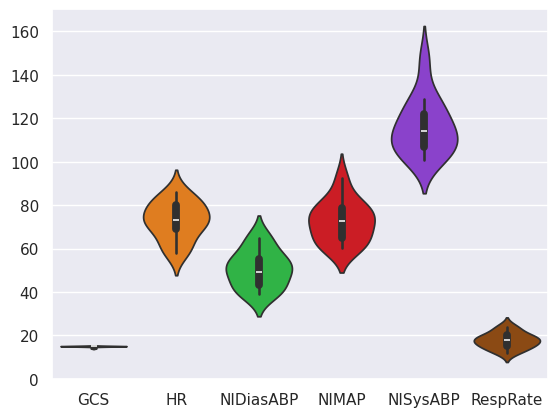

In [ ]:
sns.violinplot(data=df_reordered.transpose(), palette="bright")

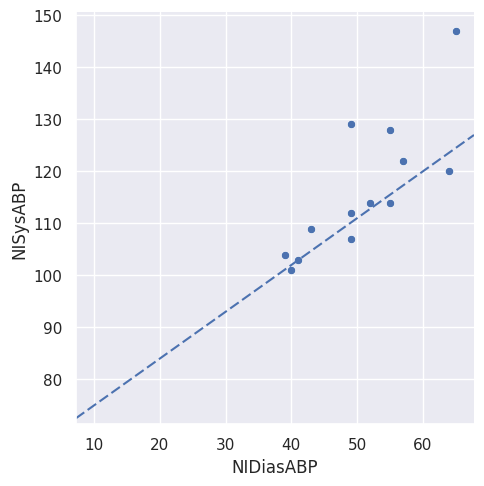

In [ ]:
g = sns.relplot(data=df_reordered.transpose(), x="NIDiasABP", y="NISysABP")
g.ax.axline(xy1=(10, 75), slope=0.9, color="b", dashes=(5, 2))

<ipython-input-64-5afa53387b28>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df_reordered.transpose(), x="RespRate", y="NISysABP", kind="box", palette = "deep")


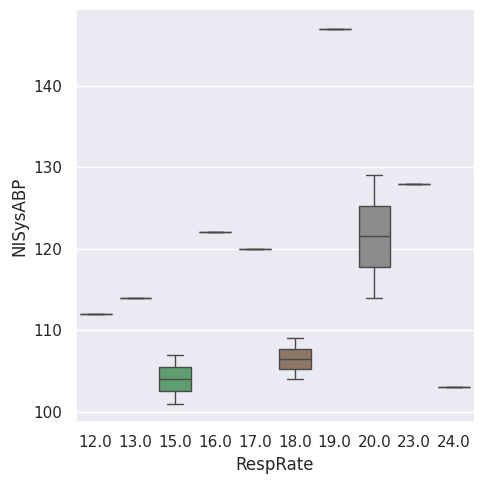

In [ ]:
sns.catplot(data=df_reordered.transpose(), x="RespRate", y="NISysABP", kind="box", palette = "deep")

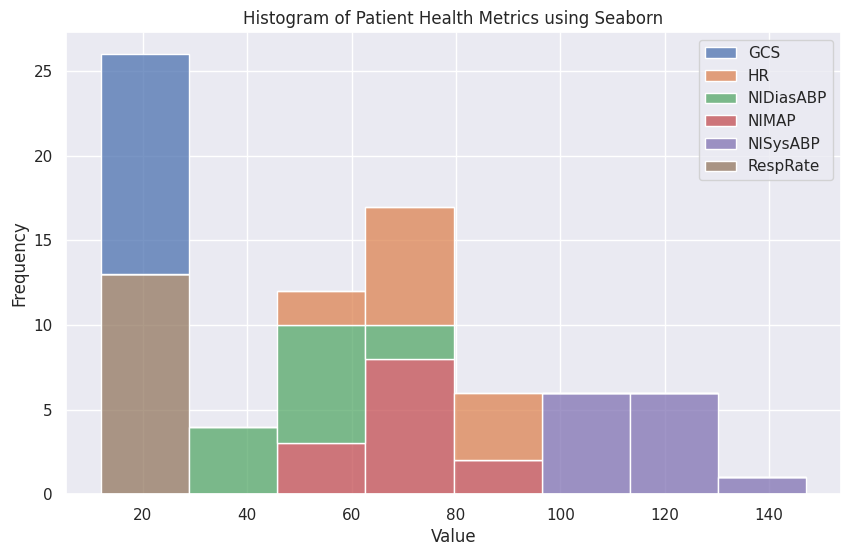

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 6))
sns.histplot(df_reordered.transpose(), multiple="stack")
plt.title('Histogram of Patient Health Metrics using Seaborn')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]